I haven't done anything useful with the cired data yet

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prim
import seaborn as sns
from sklearn import mixture
import os
from clustering_and_prim_tools import *

In [3]:
%matplotlib inline

In [4]:
sns.set_context("poster",rc={"font.size": 28})
sns.set_style("whitegrid")

In [7]:
myfolder = "transport_cired_output_data/outputs_investments_module_billionusd/"

In [9]:
os.listdir(myfolder)

['ASIA', 'CIS', 'LAM', 'MAF', 'OECD90']

remember to discount later

In [63]:
indexes = ['combi', 'ind_climat', 'ind_growth', 'ind_mitig', 'ind_trans_A',
       'ind_trans_S', 'ind_trans_I', 'ind_trans_F', 'modal_scenario',
       'costs_evolution_road', 'costs_evolution_rail', 'ur_ideal', 'urt_ideal',
       'delay']

In [35]:
all_data = pd.DataFrame()
for reg in os.listdir(myfolder):
    for myfilename in os.listdir(myfolder+reg):
        myfile = pd.read_csv(myfolder+reg+"\\"+myfilename,sep=";")
        myfile = myfile.set_index(indexes).sum(axis=1).reset_index().rename(columns={0:"total_cost"})
        myinfo = myfilename.replace(".csv",'').split("_")
        myfile["costtype"] = myinfo[1]
        myfile["transpmode"] = myinfo[2]
        myfile["region"] = myinfo[3]
        all_data = all_data.append(myfile)

In [37]:
indexes2 = ["costtype","transpmode","region"]

In [39]:
all_data = all_data.set_index(indexes+indexes2)

In [48]:
try1 = all_data.sum(level=indexes+["costtype"]).unstack("costtype")["total_cost"].reset_index()

In [77]:
try1.describe()

costtype,combi,ind_climat,ind_growth,ind_mitig,ind_trans_A,ind_trans_S,ind_trans_I,ind_trans_F,modal_scenario,costs_evolution_road,costs_evolution_rail,ur_ideal,urt_ideal,delay,maint,new
count,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000
mean,176.500000,2.000000,2.000000,1.500000,1.500000,1.500000,1.500000,1.500000,0.500000,1.000000,1.000000,600.000000,17500.000000,50.000000,92169.881534,58554.999784
std,122.898981,1.633006,0.816503,0.500004,0.500004,0.500004,0.500004,0.500004,0.500004,0.816503,0.816503,244.950943,12500.100471,15.000121,29250.315617,42162.016915
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,300.000000,5000.000000,35.000000,50123.080770,6307.147997
25%,72.750000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,300.000000,5000.000000,35.000000,71614.850097,27061.475699
50%,144.500000,2.000000,2.000000,1.500000,1.500000,1.500000,1.500000,1.500000,0.500000,1.000000,1.000000,600.000000,17500.000000,50.000000,87198.779651,44616.002838
75%,312.250000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,900.000000,30000.000000,65.000000,104106.630671,79530.010817
max,384.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,900.000000,30000.000000,65.000000,228156.429701,237140.349021


In [50]:
oois = ['maint','new']

data = np.array([[try1[oois[0]][0],try1[oois[1]][0]]])
for i in range(1,len(try1.index)):
    data = np.concatenate((data,np.array([[try1[oois[0]][i],try1[oois[1]][i]]])))

data_norm = normalize(data)

In [66]:
inputs = try1[indexes[1:]]

In [74]:
n_clusters = 6
f_value = 0.5
seuil = 1.2

In [75]:
while n_clusters>2:

    condition = True

    for i in get_prim(n_clusters, f_value, data,oois[0],oois[1],inputs)[0]:
        if i.coverage+i.density < seuil:
            condition = False
        else:
            condition = condition&True
    if condition == True:
        break
    else:
        n_clusters = n_clusters - 1
        continue


#Plot of clusters


dummy = get_prim(n_clusters, f_value, data,oois[0],oois[1],inputs)
boxes = dummy[0]
df = dummy[1]

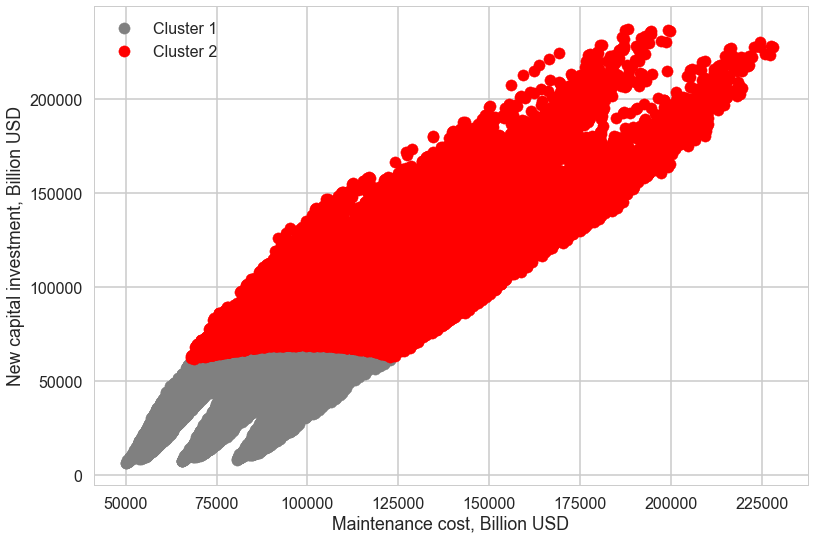

In [76]:
mycolors = ["grey","red","green","blue"]
for (i,subdf) in df.groupby("class"):

    plt.scatter(subdf.maint,subdf.new,label="Cluster {}".format(i),c=mycolors[i-1])
plt.legend()
plt.xlabel("Maintenance cost, Billion USD")
plt.ylabel("New capital investment, Billion USD")

In [72]:
boxes[0].limits

,min,max,qp values
ur_ideal,600.0,900.0,0.0


In [73]:
boxes[1].limits

,min,max,qp values
ur_ideal,300.0,300.0,0.0
